# Лабораторная работа №1

## Задание 1-2
#### Загрузка данных

In [1]:
import pandas as pd

df = pd.read_csv('vine.dat', header=None)
df.columns =['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol', 'Class']
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Задание 3
#### Стандартизация

In [2]:
from sklearn import preprocessing
import numpy as np

In [3]:
Columns = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']
scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df[Columns])
df[Columns] = x
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


## Задание 4
#### Делим на обучающую и тестовую выборки (7/3)
###### *Валидационная входит в обучающую и составляет 2 части

In [4]:
col = ['index'] + Columns + ['Class']

In [5]:
from sklearn.model_selection import train_test_split
train_table, test_table = train_test_split(df, train_size = 0.7)

train_table = train_table.reset_index()
test_table = test_table.reset_index()
# print(train_table, test_table)

df_test_table = pd.DataFrame(test_table, columns = col)
df_train_table = pd.DataFrame(train_table, columns = col)

print('train_table:')
df_train_table

train_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,489,0.563248,-0.769931,0.662546,0.043416,-0.307468,-0.561823,-0.622404,0.876283,0.187166,0.542042,-0.209308,6
1,272,1.482497,-0.881661,1.586855,1.036685,-0.349975,0.107592,0.563545,1.379796,-0.590348,0.719081,-0.303175,5
2,420,0.678154,0.179770,0.303093,-0.098479,0.032592,1.828946,0.624363,0.240266,-0.201591,0.424016,1.292568,7
3,521,-0.413454,-0.658202,1.124700,-0.382271,0.011338,0.011961,-0.105452,0.664277,1.094265,-0.107102,-1.241848,5
4,303,-0.528360,0.794282,-0.775267,-0.666062,2.094203,-1.039977,-0.774449,-0.395750,0.511130,-0.697233,-0.866379,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,542,0.563248,1.045674,-0.159061,-0.311323,-0.371229,-1.039977,-0.804858,-0.077742,-1.238276,-0.402167,-0.490910,5
1115,1103,-0.528360,-0.211283,-0.005010,-0.311323,-0.349975,-0.179300,-0.652813,-1.519379,0.251958,-0.166115,1.480302,6
1116,797,0.563248,-0.881661,0.867948,-0.666062,-1.051348,0.490115,-0.135861,-0.787960,-0.460762,0.896120,0.353895,7
1117,1288,-0.758172,0.403229,0.149042,1.391424,-0.413736,0.394484,1.931949,1.268493,-0.072005,3.020591,-0.209308,5


In [6]:
print('test_table:')
df_test_table

test_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,1545,-1.045437,0.570823,0.303093,-0.524166,-0.605020,0.011961,-0.561586,-0.761460,0.316751,-0.107102,-0.303175,6
1,917,-0.873078,-0.658202,0.200392,4.442179,-0.073677,0.968269,-0.044634,0.791480,0.446337,-0.107102,-0.303175,6
2,158,-0.700719,0.850147,-1.391472,-0.240375,-0.307468,-0.370562,-0.744040,0.081262,1.094265,-0.933285,-1.054113,5
3,1286,-0.700719,-2.054821,0.867948,-0.027532,-0.413736,0.107592,-0.470360,-1.837387,0.251958,-0.697233,1.855771,6
4,406,0.850513,-0.490607,1.021999,-0.027532,-0.520005,-0.657454,-0.561586,0.717279,-0.460762,-0.048089,0.353895,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,187,-0.356000,0.989809,-0.877968,0.043416,-0.073677,-0.657454,-0.622404,0.452272,0.511130,-0.992298,-0.678644,5
476,166,-0.873078,0.626688,-0.877968,-0.311323,-0.052423,0.203223,1.658268,-0.607756,0.187166,-0.815259,-0.209308,5
477,51,-0.987984,-0.043689,-1.186070,-0.240375,-0.392483,-0.753085,-0.956903,-0.607756,0.575922,-0.166115,-0.960246,6
478,910,0.563248,-0.825796,1.073350,0.894790,0.946502,-1.231239,-1.078539,-0.517653,-0.525555,-0.520193,2.606709,6


## Задание 5
#### Деревья решений

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix

def MakingTree(crit, alpha):
    clf = tree.DecisionTreeClassifier(criterion = crit, ccp_alpha = alpha)
    clf.fit(train_table[Columns], train_table[['Class']])
    
    # res = clf.predict(test_table[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']])
    # print(confusion_matrix(test_table, res))

    tree.plot_tree(clf,filled = True, rounded = True)
    plt.savefig('tree.pdf') ##для сохранение в пдф
    plt.show
    
    # Классифицируем тестовую выборку и находим процент совпадения
    print(clf.score(test_table[Columns], test_table[['Class']]))

## По Джинни 

0.5854166666666667


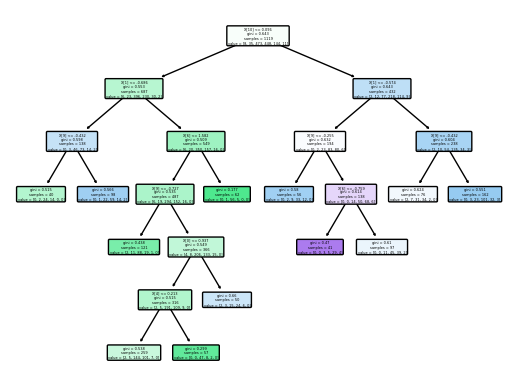

In [8]:
MakingTree('gini', 0.005)

0.5479166666666667
Хорошая Дженни


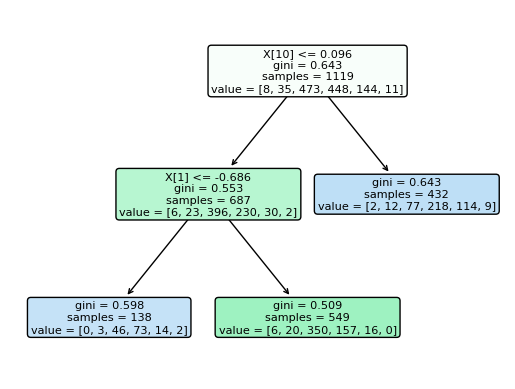

In [9]:
MakingTree('gini', 0.012)
print("Хорошая Дженни")

0.5479166666666667


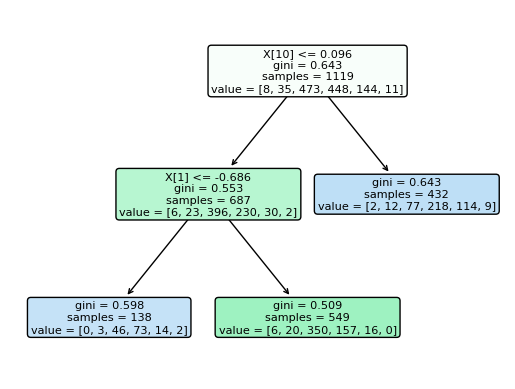

In [10]:
MakingTree('gini', 0.015)

0.5645833333333333


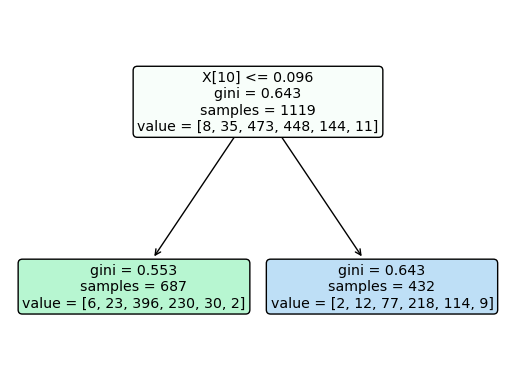

In [11]:
MakingTree('gini', 0.02)

0.5645833333333333


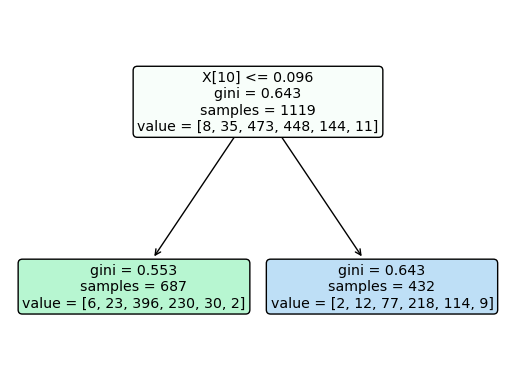

In [12]:
MakingTree('gini', 0.03)

0.43333333333333335


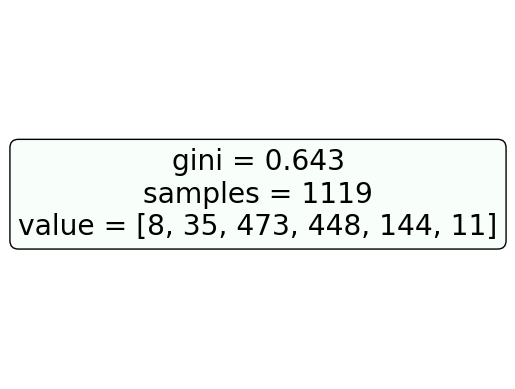

In [13]:
MakingTree('gini', 0.2)

0.43333333333333335


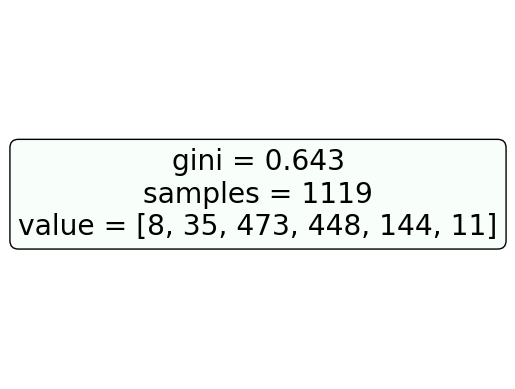

In [14]:
MakingTree('gini', 0.8)

## По энтропии

0.56875


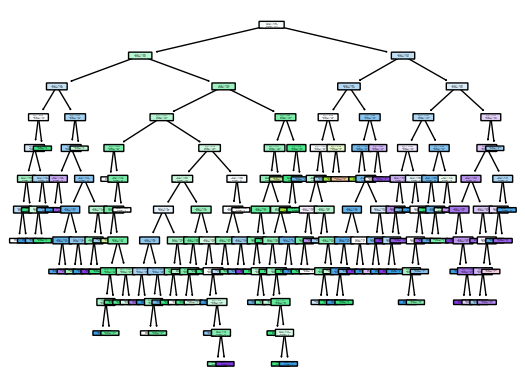

In [15]:
MakingTree('entropy', 0.005)

0.5645833333333333


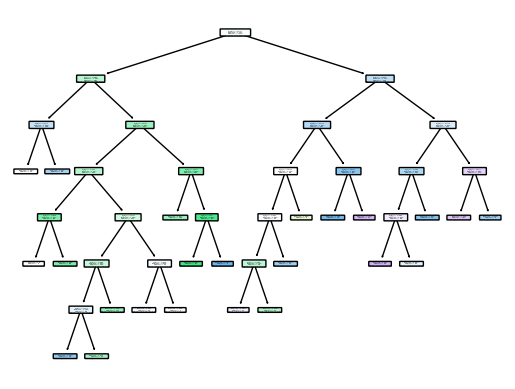

In [16]:
MakingTree('entropy', 0.01)

0.5395833333333333


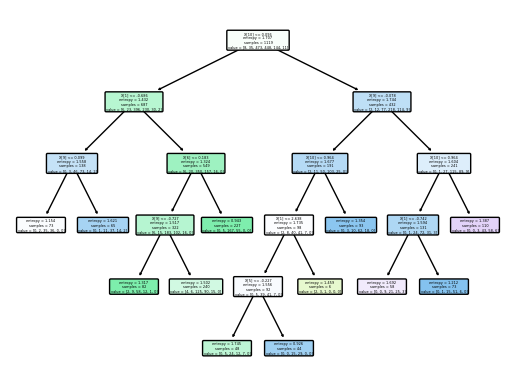

In [17]:
MakingTree('entropy', 0.015)

0.5833333333333334


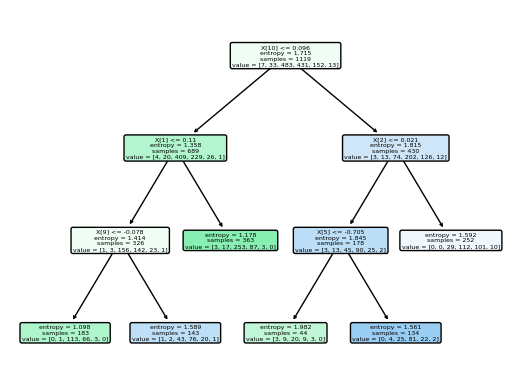

In [21]:
MakingTree('entropy', 0.02)

0.5833333333333334


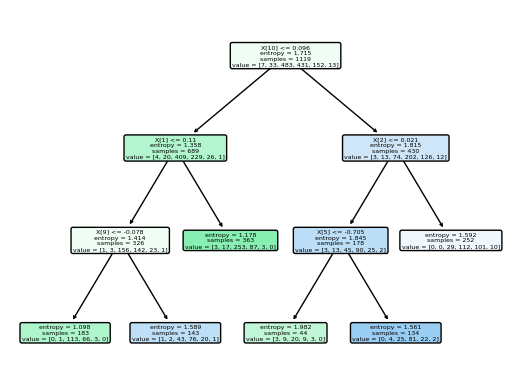

In [22]:
MakingTree('entropy', 0.025)

0.5708333333333333


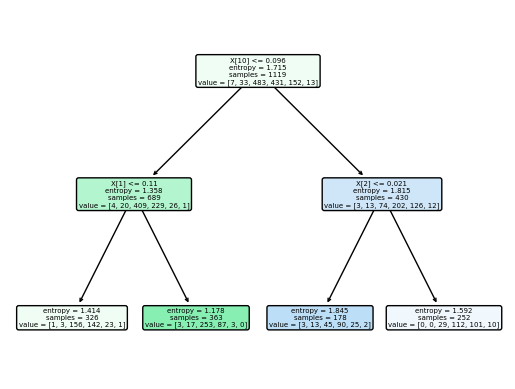

In [24]:
MakingTree('entropy', 0.03)

0.5708333333333333


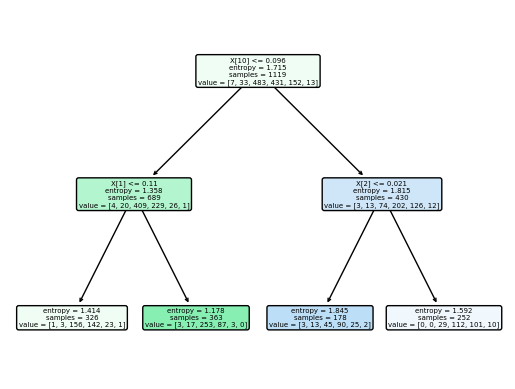

In [25]:
MakingTree('entropy', 0.035)

0.4125


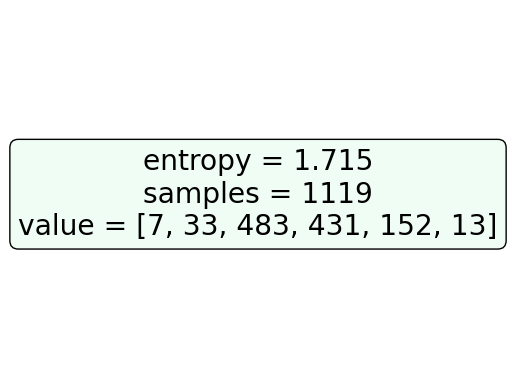

In [26]:
MakingTree('entropy', 0.2)

0.4125


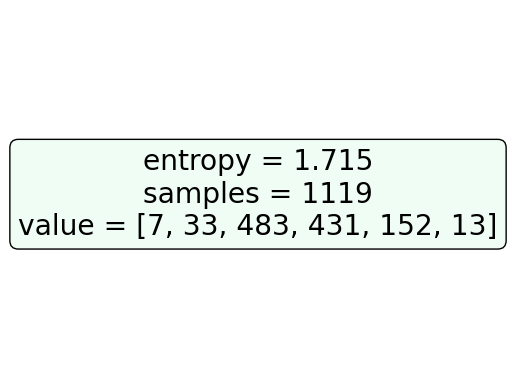

In [27]:
MakingTree('entropy', 0.8)

#### Для энтропии наилучшим дерево является при альфа = 0.025 с 58,33%
#### Для коэффициента Джинни наилучшим дерево является при альфа = 0.012 с 56,88%

In [ ]:
# Задание 6